# 1.Write a program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions.

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the correct and wrong predictions
for actual, predicted in zip(y_test, y_pred):
    result = "Correct" if actual == predicted else "Wrong"
    print(f"{result} Prediction: Actual = {actual}, Predicted = {predicted}")

# Print summary
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Correct Predictions: {sum(y_test == y_pred)}")
print(f"Wrong Predictions: {sum(y_test != y_pred)}")

Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 1, Predicted = 1
Correct Prediction: Actual = 2, Predicted = 2
Correct Prediction: Actual = 0, Predicted = 0
Correct Prediction: Actual = 2, Pr

# 2.Develop a program to apply K-means algorithm to cluster a set of data stored in .CSV file. Use the same data set for clustering using EM algorithm. Compare the results of these two algorithms and comment on the quality of clustering.

C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


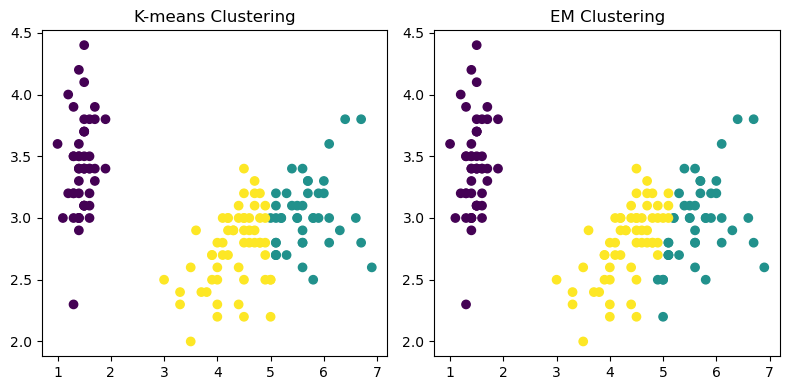

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
X = pd.read_csv('data.csv')[['PetalLengthCm', 'SepalWidthCm']].values

# Number of clusters
n_clusters = 3

# Apply K-means clustering and EM clustering
kmeans_labels = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(X)
gmm_labels = GaussianMixture(n_components=n_clusters, random_state=0).fit_predict(X)

# Plot the results
plt.figure(figsize=(8, 4))
for i, (labels, title) in enumerate(zip([kmeans_labels, gmm_labels], ['K-means Clustering', 'EM Clustering'])):
    plt.subplot(1, 2, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)

plt.tight_layout()
plt.show()


# 3.Implement the non-parametric Locally Weighted Regression algorithm in order to fit data points. Select appropriate data set for your experiment and draw graphs

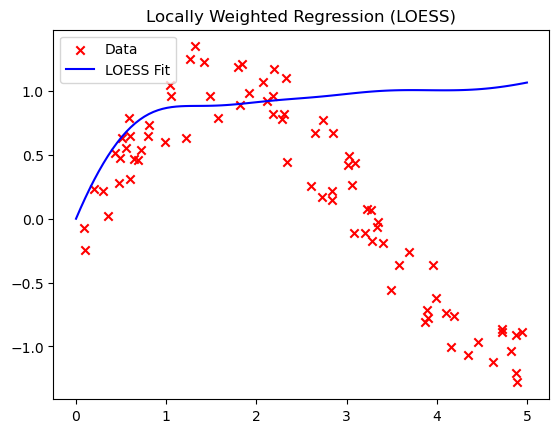

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + 0.2 * np.random.randn(80)

def loess(x, X, y, tau=0.5):
    weights = np.exp(-((X - x) ** 2) / (2 * tau ** 2))
    theta = np.sum(X * weights) / np.sum(X ** 2 * weights)
    return theta * x

x_pred = np.linspace(0, 5, 100)
y_pred = [loess(x, X, y) for x in x_pred]  # Use default tau

plt.scatter(X, y, c='r', marker='x', label='Data')
plt.plot(x_pred, y_pred, c='b', label='LOESS Fit')
plt.legend()
plt.title('Locally Weighted Regression (LOESS)')
plt.show()


# 4.Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets

In [10]:
from tensorflow import keras

X = [[0, 0], [0, 1], [1, 0], [1, 1]] 
y = [0, 1, 1, 0]

model = keras.Sequential([ keras.layers.Input(shape=(2,)),
                          keras.layers.Dense(4, activation='relu'), 
                          keras.layers.Dense(1, activation='sigmoid') ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=10)

loss, accuracy = model.evaluate(X, y)

print(f"Loss: {loss}, Accuracy: {accuracy}")

Epoch 1/10
1/1 [==============================] - 1s 638ms/step - loss: 0.6513 - accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6509 - accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6505 - accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6501 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6497 - accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 0.6492 - accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6488 - accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 0.6484 - accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 0.6480 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 175ms/step - loss: 0.6471 - accuracy: 0.7500
Loss: 0.647144615650177, Ac

# 6.Demonstrate Q learning algorithm with suitable assumption for a problem statement problem: a 2D grid world where an agent needs to find the shortest path to a goal while avoiding obstacles.

In [11]:
import numpy as np

env = np.array([[0, 0, 0, 1, 0], [0, 1, 0, 1, 0], [0, 1, 0, 1, 0], [0, 0, 0, 1, 2]])
Q = np.zeros((20, 4))  # 20 states for a 4x5 grid, 4 actions

def state_to_index(state):
    return state[0] * 5 + state[1]  # 5 columns in the grid

def move(state, action):
    new_state = (max(state[0] - 1, 0), state[1]) if action == 0 else \
               (min(state[0] + 1, 3), state[1]) if action == 1 else \
               (state[0], max(state[1] - 1, 0)) if action == 2 else \
               (state[0], min(state[1] + 1, 4))  # Limit states to valid range
    return new_state
def find_path(Q):
    state = (0, 0)
    path = [state]
    while state != (3, 4):
        action = np.argmax(Q[state_to_index(state)])
        state = move(state, action)
        path.append(state)
    return path


for _ in range(1000):  # Train for 1000 episodes
    state = (0, 0)
    while state != (3, 4):  # Goal state
        action = np.random.choice(4) if np.random.rand() < 0.2 else np.argmax(Q[state_to_index(state)])
        new_state = move(state, action)
        reward = -1 if env[new_state] == 1 else 10 if env[new_state] == 2 else 0
        Q[state_to_index(state)][action] += 0.8 * (reward + 0.95 * np.max(Q[state_to_index(new_state)]) - Q[state_to_index(state)][action])
        state = new_state

optimal_path = find_path(Q)
print("Optimal Path:")
for state in optimal_path:
    print(state)




Optimal Path:
(0, 0)
(0, 1)
(0, 2)
(1, 2)
(2, 2)
(2, 3)
(2, 4)
(3, 4)
